### 1. Generating five images passing five noise vectors/matrices drawn from a normal distribution with mean 5 and variance 1 through the Decoder of your normal Autoencoder.

#### Imported files

In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense, Flatten, Reshape, Conv2DTranspose, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

### Load the mnist dataset. Scale it and reshape.

In [51]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print('Before reshaping the training dataset', x_train.shape)
print('Before reshaping the test dataset', x_test.shape)

x_train_flat = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_flat = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print('After reshaping the training dataset', x_train_flat.shape)
print('After reshaping the test dataset', x_test_flat.shape)

Before reshaping the training dataset (60000, 28, 28)
Before reshaping the test dataset (10000, 28, 28)
After reshaping the training dataset (60000, 784)
After reshaping the test dataset (10000, 784)


### A simple autoencoder

In [52]:
LATENT_DIM = 32 
INPUT_DIM = 784

encoder_input = Input(shape=(INPUT_DIM,))
x = Dense(128, activation='relu')(encoder_input)
encoder_output = Dense(LATENT_DIM, activation='relu')(x)
encoder = Model(encoder_input, encoder_output, name='encoder')
print("\nEncoder\n")
encoder.summary()

decoder_input = Input(shape=(LATENT_DIM,))
x = Dense(128, activation='relu')(decoder_input)
decoder_output = Dense(INPUT_DIM, activation='sigmoid')(x)
decoder = Model(decoder_input, decoder_output, name='decoder')
print("\nDecoder\n")
decoder.summary()

autoencoder_input = Input(shape=(INPUT_DIM,))
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = Model(autoencoder_input, decoded_img, name='autoencoder')
print("\nAutoencoder\n")
autoencoder.summary()


Encoder

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dense_17 (Dense)            (None, 32)                4128      
                                                                 
Total params: 104608 (408.62 KB)
Trainable params: 104608 (408.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Decoder

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 32)]              0         
                                                

### Train the auto encoder

In [53]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

history = autoencoder.fit(
    x_train_flat, x_train_flat,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test_flat, x_test_flat)
)

Epoch 1/20
235/235 [==============================] - 2s 4ms/step - loss: 0.0575 - val_loss: 0.0317
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0256 - val_loss: 0.0208
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0190 - val_loss: 0.0169
Epoch 4/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0162 - val_loss: 0.0150
Epoch 5/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0148 - val_loss: 0.0138
Epoch 6/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0138 - val_loss: 0.0131
Epoch 7/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0131 - val_loss: 0.0124
Epoch 8/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0125 - val_loss: 0.0119
Epoch 9/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0120 - val_loss: 0.0115
Epoch 10/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0116 - val_loss: 0.0111

## Generate and Display Images from Noise

 The laten vector shape is : (5, 32)
1/1 [==============================] - 0s 48ms/step


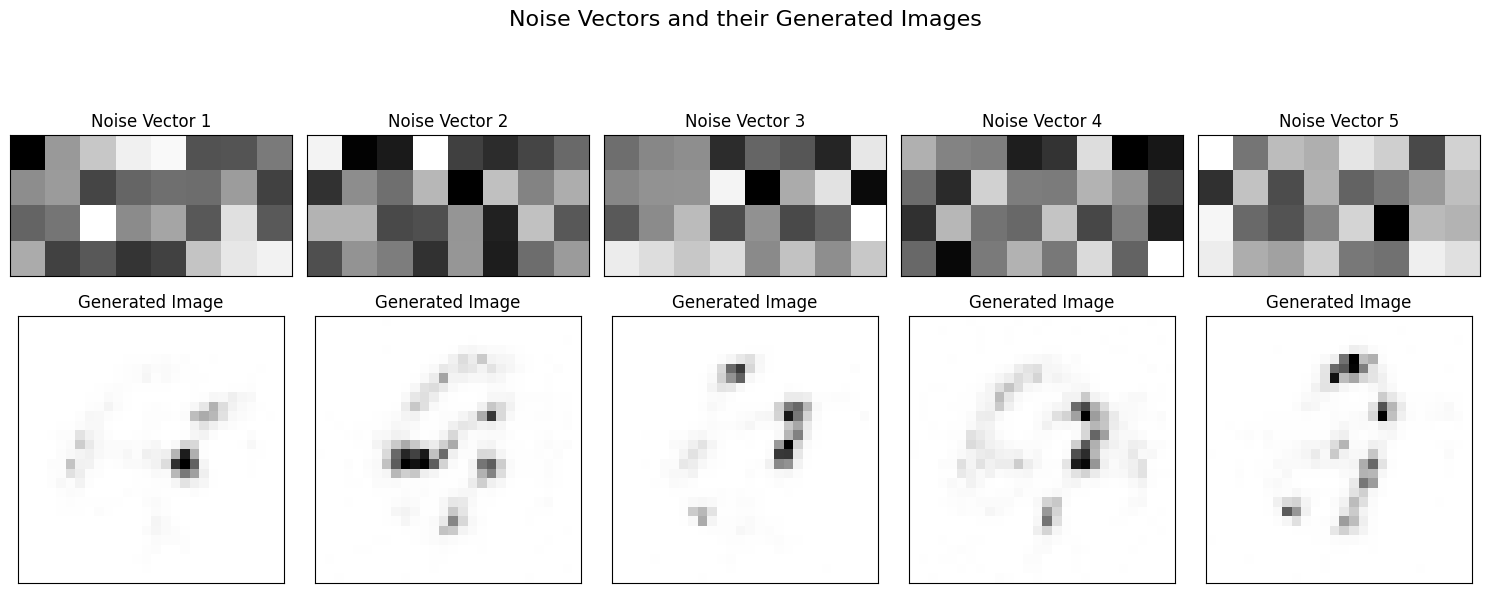

In [54]:
n = 5

# Define the parameters for the noise distribution
noise_mean = 5.0
noise_variance = 1.0
noise_stddev = np.sqrt(noise_variance)

# Generate five random noise vectors from the specified normal distribution
# it creates (5, 32) shaped laten vetory
noise_vectors = np.random.normal(loc=noise_mean, scale=noise_stddev, size=(n, LATENT_DIM))

print(f" The laten vector shape is : {noise_vectors.shape}")

# Use the decoder to generate images from the noise vectors
# it creates (5, 784) a flaten five images
generated_images_flat = decoder.predict(noise_vectors)

# Reshape the flat output back into 28x28 images
# it creates (5, 28, 28) shaped images
generated_images = generated_images_flat.reshape(n, 28, 28)

plt.figure(figsize=(15, 6))
plt.suptitle("Noise Vectors and their Generated Images", fontsize=16)

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    
    # plot the noise vector
    plt.imshow(noise_vectors[i].reshape(4, 8), cmap='Greys')
    plt.title(f"Noise Vector {i+1}")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot the generated i
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(generated_images[i], cmap='Greys')
    plt.title("Generated Image")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# use it for adjust
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 2. Generating five images passing five noise vectors/matrices drawn from a normal distribution with mean 5 and variance through the Decoder of your Denoising Autoencoder.

### Again Load and Preprocess the MNIST Dataset

In [55]:
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and reshape for a convolutional model (add a channel dimension)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

### additio of noise to the mnist dataset

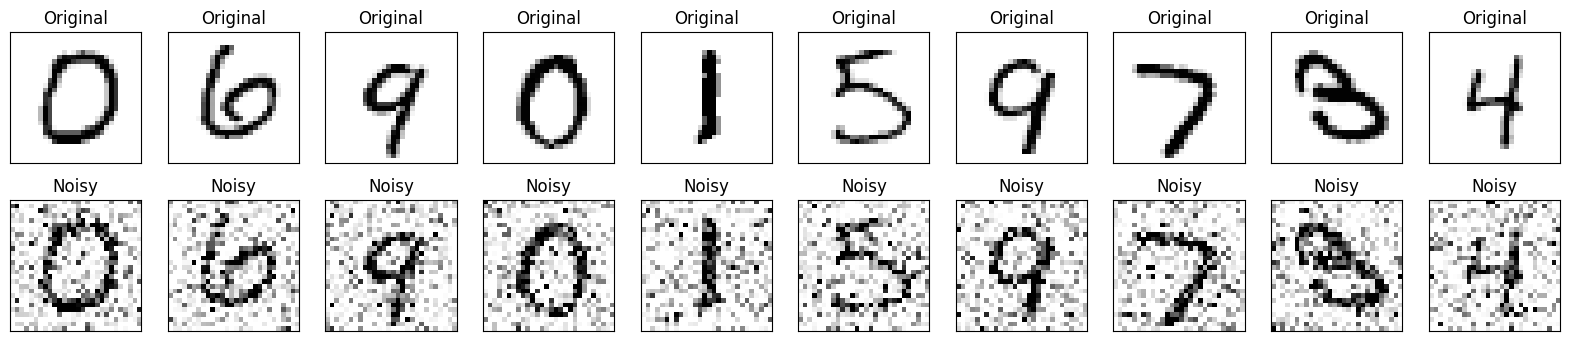

In [56]:
noise_factor = 0.4

x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i + 10], cmap='Greys')
    plt.title("Original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i + 10], cmap='Greys')
    plt.title("Noisy")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Build the Denoising Autoencoder Model

In [57]:
# Define the size of our latent space
LATENT_DIM = 32

# Encoder part
encoder_input = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu', padding='same', strides=2)(encoder_input) # 14x14
x = Conv2D(32, (3, 3), activation='relu', padding='same', strides=2)(x) # 7x7
shape_before_flattening = x.shape[1:]
x = Flatten()(x)
encoder_output = Dense(LATENT_DIM, activation='relu')(x)
encoder = Model(encoder_input, encoder_output, name='encoder')

encoder.summary()

# Decoder part
decoder_input = Input(shape=(LATENT_DIM,))
x = Dense(np.prod(shape_before_flattening), activation='relu')(decoder_input)
x = Reshape(shape_before_flattening)(x)
x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same', strides=2)(x) # 14x14
x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same', strides=2)(x) # 28x28
decoder_output = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
decoder = Model(decoder_input, decoder_output, name='decoder')
decoder.summary()

# Full Denoising Autoencoder
autoencoder_input = Input(shape=(28, 28, 1))
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
denoising_autoencoder = Model(autoencoder_input, decoded_img, name='denoising_autoencoder')
print("\n--- Full Denoising Autoencoder Summary ---")
denoising_autoencoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 16)        160       
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 32)          4640      
                                                                 
 flatten_4 (Flatten)         (None, 1568)              0         
                                                                 
 dense_20 (Dense)            (None, 32)                50208     
                                                                 
Total params: 55008 (214.88 KB)
Trainable params: 55008 (214.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "decoder"
____

## Compile and Train the Denoising Autoencoder

In [58]:
# Compile the autoencoder
denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
print("\n--- Training the Denoising Autoencoder ---")
denoising_autoencoder.fit(
    x_train_noisy, x_train, # <--- Noisy input, clean target
    epochs=25,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test) # <--- Noisy validation input, clean target
)


--- Training the Denoising Autoencoder ---
Epoch 1/25
469/469 [==============================] - 24s 49ms/step - loss: 0.2380 - val_loss: 0.1418
Epoch 2/25
469/469 [==============================] - 23s 49ms/step - loss: 0.1294 - val_loss: 0.1188
Epoch 3/25
469/469 [==============================] - 23s 50ms/step - loss: 0.1168 - val_loss: 0.1120
Epoch 4/25
469/469 [==============================] - 23s 50ms/step - loss: 0.1109 - val_loss: 0.1076
Epoch 5/25
469/469 [==============================] - 23s 50ms/step - loss: 0.1073 - val_loss: 0.1052
Epoch 6/25
469/469 [==============================] - 23s 49ms/step - loss: 0.1049 - val_loss: 0.1032
Epoch 7/25
469/469 [==============================] - 23s 50ms/step - loss: 0.1031 - val_loss: 0.1019
Epoch 8/25
469/469 [==============================] - 23s 50ms/step - loss: 0.1018 - val_loss: 0.1007
Epoch 9/25
469/469 [==============================] - 23s 50ms/step - loss: 0.1008 - val_loss: 0.0996
Epoch 10/25
469/469 [=================

## Generate and Display Images from Noise

Shape of generated noise vectors: (5, 32)
1/1 [==============================] - 0s 66ms/step


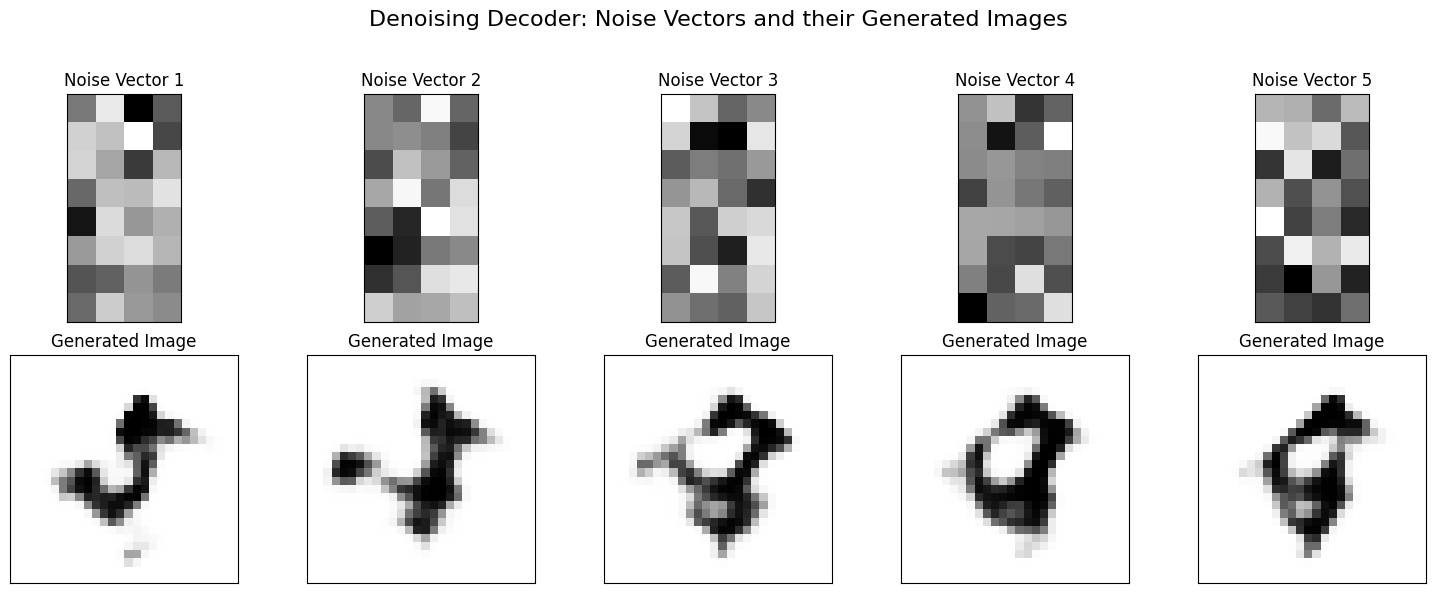

In [59]:
# Number of images to generate
n = 5

# Define the parameters for the noise distribution
noise_mean = 5.0
noise_variance = 1.0
noise_stddev = np.sqrt(noise_variance)

# Generate five random noise vectors
noise_vectors = np.random.normal(loc=noise_mean, scale=noise_stddev, size=(n, LATENT_DIM))

print(f"Shape of generated noise vectors: {noise_vectors.shape}")

# Use the standalone decoder to generate images from the noise vectors
generated_images = decoder.predict(noise_vectors)

# --- Plot the results in a 2-row grid ---
plt.figure(figsize=(15, 6))
plt.suptitle("Denoising Decoder: Noise Vectors and their Generated Images", fontsize=16)

for i in range(n):
    # --- Plot the input noise vector (top row) ---
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(noise_vectors[i].reshape(8, 4), cmap='Greys')
    plt.title(f"Noise Vector {i+1}")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # --- Plot the generated image (bottom row) ---
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(generated_images[i].reshape(28, 28), cmap='Greys')
    plt.title("Generated Image")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### 3. Training and evaluating a Variational Autoencoder

In [67]:
# Load the dataset with labels this time
(x_train, _), (x_test, y_test) = mnist.load_data()

# Normalize and reshape for a convolutional model
x_train = np.expand_dims(x_train.astype('float32') / 255., -1)
x_test = np.expand_dims(x_test.astype('float32') / 255., -1)

In [68]:

LATENT_DIM = 2
IMAGE_SHAPE = (28, 28, 1)

# --- 1. Encoder ---
# It outputs the parameters of the latent distribution, not just a single point.
# One for the mean (z_mean)
# One for the log-variance (z_log_var)

encoder_inputs = Input(shape=IMAGE_SHAPE)
x = Conv2D(32, 3, activation='relu', strides=2, padding='same')(encoder_inputs)
x = Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = Flatten()(x)
x = Dense(16, activation='relu')(x)

# Two output heads for the distribution parameters
z_mean = Dense(LATENT_DIM, name='z_mean')(x)
z_log_var = Dense(LATENT_DIM, name='z_log_var')(x)

# --- 2. Sampling Layer (Reparameterization Trick) ---
# We define a function to sample z from the learned distribution
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # Sample from a standard normal distribution
    epsilon = K.random_normal(shape=(batch, dim))
    # Return the reparameterized sample
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

# Use a Lambda layer to wrap the sampling function
z = Lambda(sampling, output_shape=(LATENT_DIM,), name='z')([z_mean, z_log_var])

# Instantiate the encoder model which takes an image and outputs z_mean, z_log_var, and the sampled z
encoder = Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()

# Decoder part
decoder_inputs = Input(shape=(LATENT_DIM,))
x = Dense(7 * 7 * 64, activation='relu')(decoder_inputs)
x = Reshape((7, 7, 64))(x)
x = Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
decoder_outputs = Conv2DTranspose(1, 3, activation='sigmoid', padding='same')(x)
decoder = Model(decoder_inputs, decoder_outputs, name='decoder')
decoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_25 (InputLayer)       [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_15 (Conv2D)          (None, 14, 14, 32)           320       ['input_25[0][0]']            
                                                                                                  
 conv2d_16 (Conv2D)          (None, 7, 7, 64)             18496     ['conv2d_15[0][0]']           
                                                                                                  
 flatten_6 (Flatten)         (None, 3136)                 0         ['conv2d_16[0][0]']           
                                                                                            

## Defining the Full VAE Model with Custom Loss

VAE model class defined with call() and test_step().


## Instantiate, Compile, and Train the VAE

In [70]:

vae = VAE(encoder, decoder)

# Compile the VAE
vae.compile(optimizer=keras.optimizers.Adam())

# Train the VAE

history = vae.fit(x_train, epochs=20, batch_size=128, validation_data=(x_test, None))

Epoch 1/20
469/469 [==============================] - 30s 61ms/step - total_loss: 214.3408 - reconstruction_loss: 211.3837 - kl_loss: 2.9571 - val_total_loss: 193.6725 - val_reconstruction_loss: 190.4580 - val_kl_loss: 3.2145
Epoch 2/20
469/469 [==============================] - 29s 62ms/step - total_loss: 183.9684 - reconstruction_loss: 179.2388 - kl_loss: 4.7296 - val_total_loss: 174.2582 - val_reconstruction_loss: 168.9545 - val_kl_loss: 5.3037
Epoch 3/20
469/469 [==============================] - 30s 64ms/step - total_loss: 170.6897 - reconstruction_loss: 165.0222 - kl_loss: 5.6674 - val_total_loss: 167.1738 - val_reconstruction_loss: 161.2742 - val_kl_loss: 5.8997
Epoch 4/20
469/469 [==============================] - 29s 62ms/step - total_loss: 165.9086 - reconstruction_loss: 160.0016 - kl_loss: 5.9070 - val_total_loss: 164.5133 - val_reconstruction_loss: 158.4602 - val_kl_loss: 6.0531
Epoch 5/20
469/469 [==============================] - 30s 63ms/step - total_loss: 162.9731 - rec

## Evaluate the Trained VAE

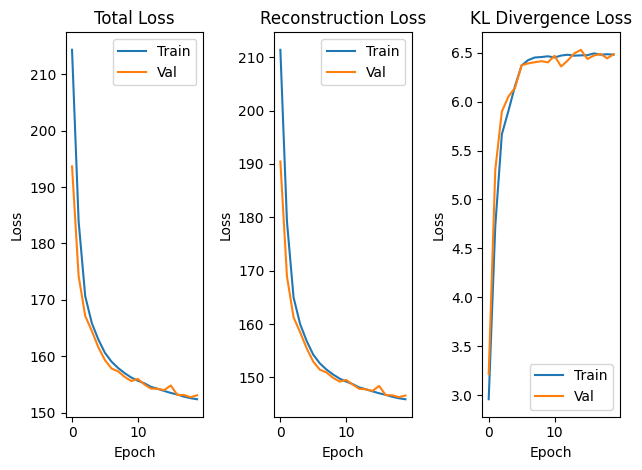

In [71]:
plt.subplot(1, 3, 1)
plt.plot(history.history['total_loss'], label='Train')
plt.plot(history.history['val_total_loss'], label='Val')
plt.title('Total Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Reconstruction Loss
plt.subplot(1, 3, 2)
plt.plot(history.history['reconstruction_loss'], label='Train')
plt.plot(history.history['val_reconstruction_loss'], label='Val')
plt.title('Reconstruction Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# KL Loss
plt.subplot(1, 3, 3)
plt.plot(history.history['kl_loss'], label='Train')
plt.plot(history.history['val_kl_loss'], label='Val')
plt.title('KL Divergence Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 82ms/step


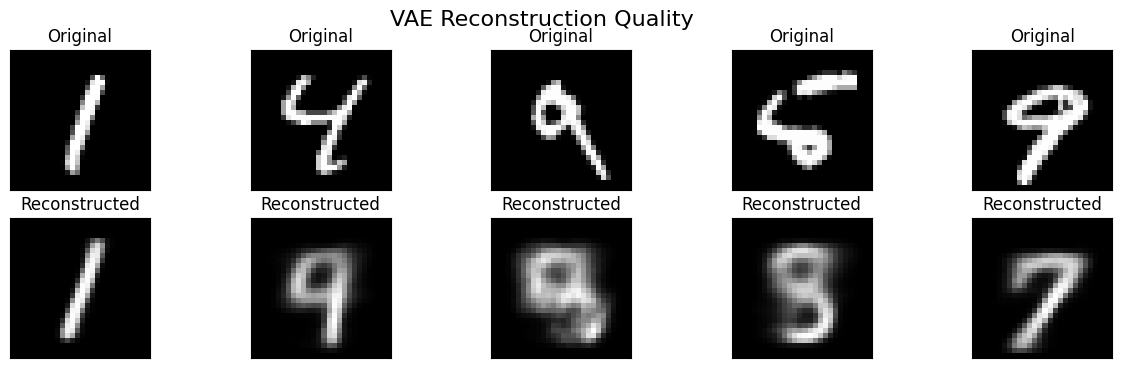

In [64]:
# --- 1. Evaluate Reconstruction Quality ---
# Get a batch of test images
n = 5
sample_images = x_test[n:n+5]

# Pass them through the full VAE to get reconstructions
_, _, z_samples = vae.encoder.predict(sample_images)
reconstructed_images = vae.decoder.predict(z_samples)

# Plot original vs. reconstructed
plt.figure(figsize=(15, 4))
plt.suptitle("VAE Reconstruction Quality", fontsize=16)
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    ax.set_title("Original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    ax.set_title("Reconstructed")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# --- 2. Evaluate Latent Space Structure ---
# Pass the entire test set through the encoder to get the latent space coordinates (z_mean)

## Generated Image from Random Noise with Mean 5 and Variance 1

Shape of generated noise vectors: (5, 2)
1/1 [==============================] - 0s 32ms/step


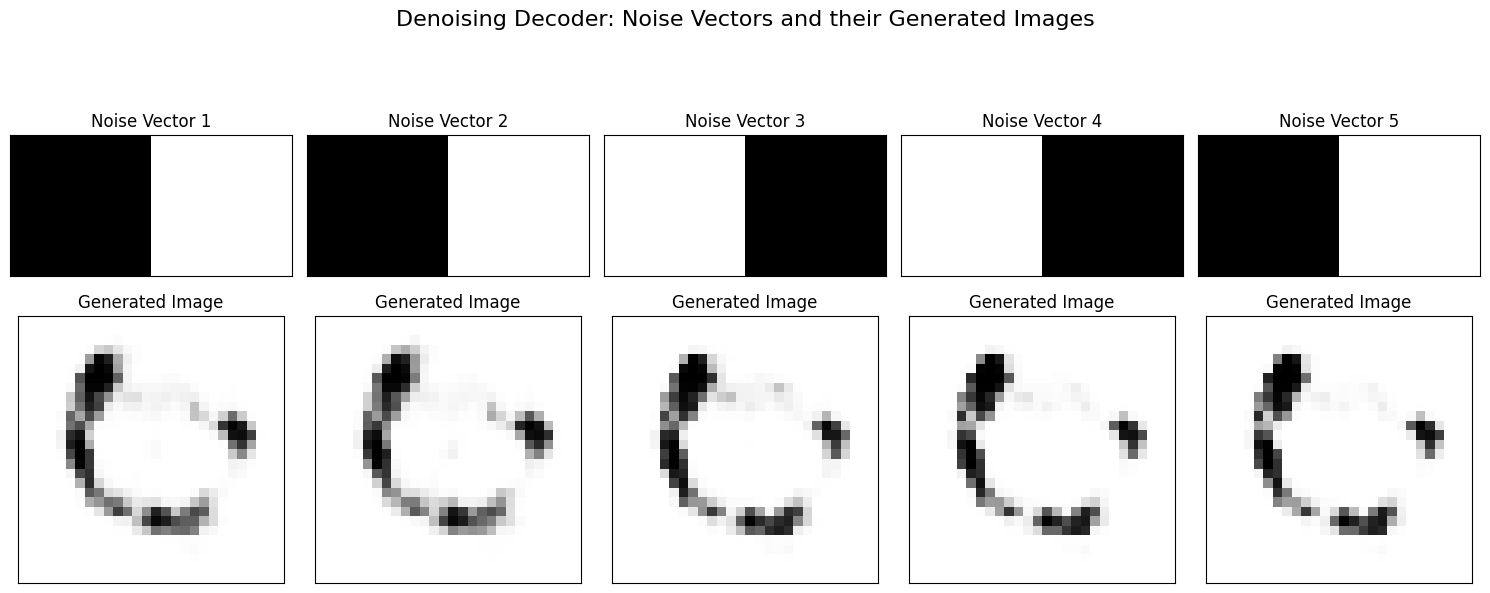

In [65]:
# Number of images to generate
n = 5

# Define the parameters for the noise distribution
noise_mean = 5.0
noise_variance = 1.0
noise_stddev = np.sqrt(noise_variance)

# Generate five random noise vectors
noise_vectors = np.random.normal(loc=noise_mean, scale=noise_stddev, size=(n, LATENT_DIM))

print(f"Shape of generated noise vectors: {noise_vectors.shape}")

# Use the standalone decoder to generate images from the noise vectors
generated_images = decoder.predict(noise_vectors)

# --- Plot the results in a 2-row grid ---
plt.figure(figsize=(15, 6))
plt.suptitle("Denoising Decoder: Noise Vectors and their Generated Images", fontsize=16)

for i in range(n):
    # --- Plot the input noise vector (top row) ---
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(noise_vectors[i].reshape(1, 2), cmap='Greys')
    plt.title(f"Noise Vector {i+1}")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # --- Plot the generated image (bottom row) ---
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(generated_images[i].reshape(28, 28), cmap='Greys')
    plt.title("Generated Image")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()